<a href="https://colab.research.google.com/github/borrokk/github-slideshow/blob/master/draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/kwentar/blur-dataset'

In [ ]:
import os

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: meghadas
Your Kaggle Key: ··········


  0%|          | 5.00M/1.49G [00:00<00:32, 48.9MB/s]

100%|██████████| 1.49G/1.49G [00:16<00:00, 99.3MB/s]


In [ ]:
os.listdir(data_dir)

['blur_dataset_scaled', 'motion_blurred', 'defocused_blurred', 'sharp']

In [ ]:
data_dir = './blur-dataset'

In [ ]:
shutil.move("/content/blur-dataset", "/content/input") 

In [ ]:
import shutil

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
#file 1
src_dir = '/content/input/blur-dataset/sharp'
images = os.listdir(src_dir)
dst_dir = '/content/input/blur-dataset/gaussian_blurred'

for i, img in tqdm(enumerate(images), total=len(images)):
    img = cv2.imread(f"{src_dir}/{images[i]}")
    # add gaussian blurring
    blur = cv2.GaussianBlur(img, (51, 51), 0)
    cv2.imwrite(f"{dst_dir}/{images[i]}", blur)

print('DONE')

100%|██████████| 350/350 [01:46<00:00,  3.29it/s]

DONE


In [ ]:
gauss_blur = os.listdir('/content/input/blur-dataset/gaussian_blurred')
gauss_blur.sort()
sharp = os.listdir('/content/input/blur-dataset/sharp')
sharp.sort()
#file2 from ipynb

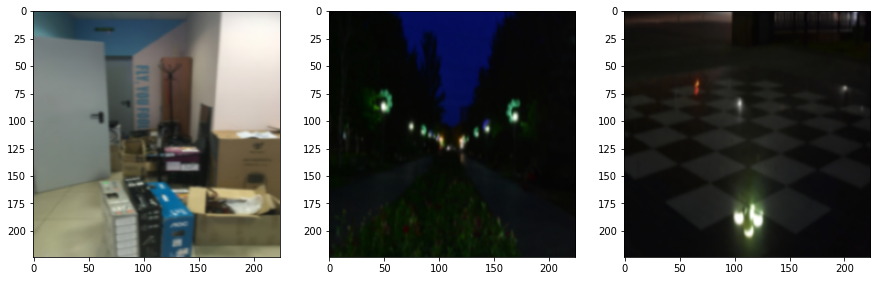

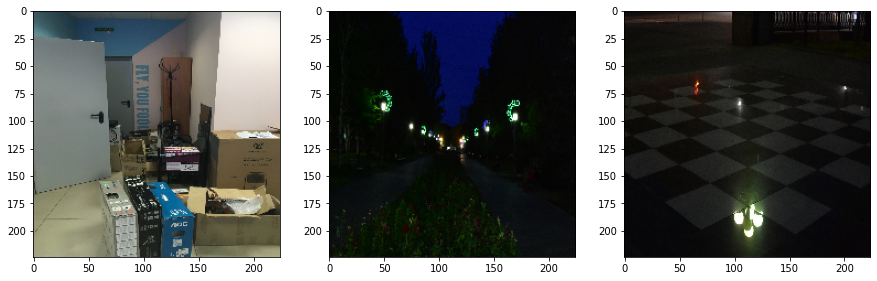

In [ ]:
plt.figure(figsize=(15, 12))
for i in range(3):
    blur_image = plt.imread(f"/content/input/blur-dataset/gaussian_blurred/{gauss_blur[i]}")
    blur_image = cv2.resize(blur_image, (224, 224))
    plt.subplot(1, 3, i+1)
    plt.imshow(blur_image)
plt.show()

plt.figure(figsize=(15, 12))
for i in range(3):
    sharp_image = plt.imread(f"/content/input/blur-dataset/sharp/{sharp[i]}")
    sharp_image = cv2.resize(sharp_image, (224, 224))
    plt.subplot(1, 3, i+1)
    plt.imshow(sharp_image)
plt.show()
#ipynbfile

In [ ]:
#Checking that the blur and sharp images correspond correctly
x_blur = []
for i in range(len(gauss_blur)):
    x_blur.append(gauss_blur[i])

y_sharp = []
for i in range(len(sharp)):
    y_sharp.append(sharp[i])
    
print(x_blur[28])
print(y_sharp[28])
#file2

125_NIKON-D3400-35MM_S.JPG
125_NIKON-D3400-35MM_S.JPG


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#file3
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 128, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=1, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        return x

class SimpleAE(nn.Module):
    def __init__(self):
        super(SimpleAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(64, 32, kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Namespace(epochs=50)
['-f', '/root/.local/share/jupyter/runtime/kernel-d56f1332-b5ae-4d08-be50-117d89a9b685.json']
cuda:0
109_HONOR-7X_S.jpg
109_HONOR-7X_S.jpg
262
88


  0%|          | 0/131 [00:00<?, ?it/s]

CNN(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
)
Epoch 1 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.03747


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00464
Epoch 2 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00344


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00312
Epoch 3 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00303


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00300
Epoch 4 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00297


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00293
Epoch 5 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00296


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00294
Epoch 6 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00295


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00286
Epoch 7 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00284


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00281
Epoch 8 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00308


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00286
Epoch 9 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00283


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00278
Epoch 10 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00280


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00276
Epoch 11 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00277


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00274
Epoch 12 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00276


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00273
Epoch 13 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00275


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00272
Epoch 14 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00275


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00278
Epoch 15 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00275


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00276
Epoch 16 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00274


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00270
Epoch 17 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00313


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00339
Epoch 18 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00282


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00272
Epoch 19 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00274


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00271
Epoch 20 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00275


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00269
Epoch 21 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00272


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00269
Epoch 22 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00271


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00268
Epoch 23 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00271


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00270
Epoch 24 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00286


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00269
Epoch 25 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00271


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00267
Epoch 26 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00267
Epoch 27 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00267
Epoch 28 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00271
Epoch 29 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00266
Epoch 30 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00266
Epoch 31 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00280


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00273
Epoch 32 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00266
Epoch 33 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00268


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00266
Epoch 34 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00269


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00265
Epoch 35 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00273


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00264
Epoch 36 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00268


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00264
Epoch 37 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00269


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00265
Epoch 38 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00269


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00269
Epoch 39 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00271


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00263
Epoch 40 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00267


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00266
Epoch 41 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00268


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00264
Epoch 42 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00267


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00264
Epoch 43 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00269


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00267
Epoch 44 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00270


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00266
Epoch 45 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00281


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00264
Epoch    45: reducing learning rate of group 0 to 1.0000e-04.
Epoch 46 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00267


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00263
Epoch 47 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00266


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00263
Epoch 48 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00266


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00263
Epoch 49 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00266


  0%|          | 0/131 [00:00<?, ?it/s]

Val Loss: 0.00262
Epoch 50 of 50


  0%|          | 0/44 [00:00<?, ?it/s]

Train Loss: 0.00266


100%|██████████| 44/44 [00:10<00:00,  4.36it/s]


Val Loss: 0.00262
Took -34.979 minutes to train


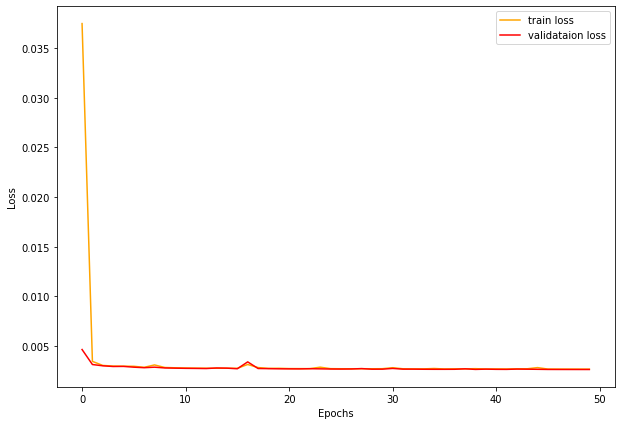

Saving model...


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import albumentations
import argparse
from src import models #use from

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split

# constructing the argument parser
parser = argparse.ArgumentParser()
parser.add_argument('-e', '--epochs', type=int, help="number of epochs to train the model for", default = 50) 
args, unknown = parser.parse_known_args()
print(args)
print(unknown)
#args = vars(parser.parse_args()) #why error check 
#vars(args)


# helper functions
image_dir = '/content/outputs/saved_images'
os.makedirs(image_dir, exist_ok=True)
    
def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

batch_size = 2

gauss_blur = os.listdir('/content/input/blur-dataset/gaussian_blurred/')
gauss_blur.sort()
sharp = os.listdir('/content/input/blur-dataset/sharp/')
sharp.sort()

x_blur = []
for i in range(len(gauss_blur)):
    x_blur.append(gauss_blur[i])

y_sharp = []
for i in range(len(sharp)):
    y_sharp.append(sharp[i])
    
print(x_blur[10])
print(y_sharp[10])

(x_train, x_val, y_train, y_val) = train_test_split(x_blur, y_sharp, test_size=0.25)

print(len(x_train))
print(len(x_val))

# define transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class DeblurDataset(Dataset):
    def __init__(self, blur_paths, sharp_paths=None, transforms=None):
        self.X = blur_paths
        self.y = sharp_paths
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        blur_image = cv2.imread(f"/content/input/blur-dataset/gaussian_blurred/{self.X[i]}")
        
        if self.transforms:
            blur_image = self.transforms(blur_image)
            
        if self.y is not None:
            sharp_image = cv2.imread(f"/content/input/blur-dataset/sharp/{self.y[i]}")
            sharp_image = self.transforms(sharp_image)
            return (blur_image, sharp_image)
        else:
            return blur_image

train_data = DeblurDataset(x_train, y_train, transform)
val_data = DeblurDataset(x_val, y_val, transform)
 
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

model = models.CNN().to(device)
print(model)

# the loss function
criterion = nn.MSELoss()
# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
        optimizer,
        mode='min',
        patience=5,
        factor=0.1,
        verbose=True
    )

def fit(model, dataloader, epoch):
    model.train()
    running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        blur_image = data[0]
        sharp_image = data[1]
        blur_image = blur_image.to(device)
        sharp_image = sharp_image.to(device)
        optimizer.zero_grad()
        outputs = model(blur_image)
        loss = criterion(outputs, sharp_image)
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss/len(dataloader.dataset)
    
    sentence = f'Train Loss: {train_loss:.5f}'
    print(sentence)
    return train_loss

# the training function
def validate(model, dataloader, epoch):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            blur_image = data[0]
            sharp_image = data[1]
            blur_image = blur_image.to(device)
            sharp_image = sharp_image.to(device)
            outputs = model(blur_image)
            loss = criterion(outputs, sharp_image)
            running_loss += loss.item()

            if epoch == 0 and i == (len(val_data)/dataloader.batch_size)-1:
                save_decoded_image(sharp_image.cpu().data, name=f"/content/outputs/saved_images/sharp{epoch}.jpg")
                save_decoded_image(blur_image.cpu().data, name=f"/content/outputs/saved_images/blur{epoch}.jpg")

        val_loss = running_loss/len(dataloader.dataset)
        print(f"Val Loss: {val_loss:.5f}")

        save_decoded_image(outputs.cpu().data, name=f"/content/outputs/saved_images/val_deblurred{epoch}.jpg")
        
        return val_loss

train_loss  = []
val_loss = []
start = time.time()
for epoch in range(args.epochs): #for epoch in range(args['epochs']):
    s2 = f'Epoch {epoch+1} of {args.epochs}' # sentence = f'Train Loss: {train_loss:.5f}'
    print(s2)
    train_epoch_loss = fit(model, trainloader, epoch)
    val_epoch_loss = validate(model, valloader, epoch)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    scheduler.step(val_epoch_loss)
end = time.time()

print(f"Took {((start-end)/60):.3f} minutes to train")

# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/outputs/loss.png')
plt.show()

# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), '/content/outputs/model.pth')

#file4

In [ ]:
#Script to add Gaussian blurring to a test data

import cv2
import os
import glob as glob

from tqdm import tqdm

src_dir = '/content/test_data' #to folder called test_data name should be changed to exact path, add 2 images for testing
images = glob.glob(f"{src_dir}/*.jpg")
dst_dir = '/content/test_data/gaussian_blurred' # empty folder needs to be created prior ...which then stores the blurred image

for i, img in tqdm(enumerate(images), total=len(images)):
    img = cv2.imread(f"{images[i]}")
    # add gaussian blurring
    blur = cv2.GaussianBlur(img, (15, 15), 0)
    cv2.imwrite(f"{dst_dir}/image_{i+1}.jpg", blur)

print('DONE')
#file5

100%|██████████| 2/2 [00:00<00:00, 64.97it/s]

DONE


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
from src import models
import torch

from torchvision.transforms import transforms
from torchvision.utils import save_image

def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

device = 'cpu'

# load the trained model
model = models.CNN().to(device).eval()
model.load_state_dict(torch.load('/content/outputs/model.pth'))

# define transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

name = 'image_1'

image = cv2.imread(f"/content/test_data/gaussian_blurred/{name}.jpg") #make sure to add pics for reading
orig_image = image.copy()
orig_image = cv2.resize(orig_image, (224, 224))
cv2.imwrite(f"/content/outputs/test_deblurred_images/original_blurred_image_2.jpg", orig_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = transform(image).unsqueeze(0)
print(image.shape)

with torch.no_grad():
    outputs = model(image)
    save_decoded_image(outputs.cpu().data, name=f"/content/outputs/test_deblurred_images/deblurred_image_2.jpg")

# file6

torch.Size([1, 3, 224, 224])
